The publication (~/EEG_DL/ref_articles/ds003685_EEG_analysis.pdf) explains:

Main aim: Are neural activity patterns of different mental states measured by EEG stable over time?

Hypothesis: "The present study systematically examined the test-retest reproduc- ibility in two resting states (eyes open and eyes closed) and three mental imaginary task states (performed mental arithmetic, recalled the events of their day, and silently sang lyrics). As mentioned above, we compared the reproducibility of these five states in seven rhythms at the sensor level and large-scale brain networks at the source level. We hypothesized that the reproducibility of different mental states varies between rhythms and large-scale networks, due to the task-specific activation of brain regions that may have larger and more stable responses. This study aimed to find out the most stable state of the EEG power spectrum by comparing the test-retest reproducibility in these five states so that we can provide suggestions for future EEG research and applications."

Methods
    Participants: The final analysis data consisted of sixty healthy adults (age range = 18–21 years old; mean = 19.7 ± 1.3 years old; 25 males) who underwent all three EEG recording sessions, including the present (session 1), 90 min later (session 2), and one month later (session 3). All subjects were right- handed with normal or corrected to normal vision, and reported no neurological or psychiatric diseases. On the date of the EEG recording, alcohol, or caffeinated food or beverages were prohibited. Every subject was compensated for participation.

    Experimental design:Each subject was invited to the lab twice exactly with one month apart. Participants received the testing protocol twice with 90 min apart during their first visit and had the same testing protocol for a third time during their second visit.
    During each EEG recording session, all the subjects completed the five states including two resting states (eyes open, eyes closed) and three mental task states (recall the events of their day, sing lyrics in their head, and perform mental arithmetic). During each session, subjects completed the resting state first, followed by the three mental task states. The mental tasks were presented in a randomized order among all subjects.
    Specifically, during the resting state with eyes open (EO), subjects were instructed to stare at a white cross in the middle of the screen. During the resting state with eyes closed (EC), subjects were instructed to close their eyes and rest, let their thinking wander, and try not to focus on one thing. During the memory task state (ME), subjects needed to recall the event that happened from the time they woke up to the moment they took part in the experiment. During the music task state (MU), subjects needed to sing their favorite songs in their head. During the mental arithmetic task state (MA), subjects were instructed to decrease 7 from 5000 (Shirer et al., 2012). The three task states are all completed with the eyes closed, which helps to reduce the influence of blinking and the interference of the external environment. All five states lasted for five minutes. The subjects were required to repeat the same process if they turned out to finish earlier than five minutes (for example, sang their favorite songs several times). To make sure the subjects were taking part in the experiment carefully, subjects received relative questionnaires after each state. Moreover, they would have got probed during the specific mental task (e.g. pause and let them say the current number in the MA task).
    EEG acquisition and recording
    EEG was recorded by 63 Ag/AgCl electrodes installed within an elastic cap, based on the extended international 10–20 system (Brain Products Gmbh, Steingrabenstr, Germany). Two of these electrodes were used to record electrooculography (EOG), and FCz was used as an online reference electrode. The sampling frequency was 500 Hz and the resis- tance of all electrodes was kept below 5 kΩ. Finally, there was a 900 five- minute EEG dataset (3 sessions × 5 states × 60 subjects).


Data analysis
3.1. Pre-processing
The preprocessing of the original EEG signal contained four steps, which were implemented in EEGLAB (version 2019_1, http://sccn.ucsd. edu). In the first step, the raw data were re-referenced to a common average reference. And filtered using a symmetric Finite Impulse Response filter with frequency band of 0.3–45 Hz. In the second step, EEG signals were visually inspected and the bad channels were removed. And then we used linear interpolation to reconstruct missing data (replaced by the average of the surrounding nearest neighbor channels). After that, data were re-referenced to a common average reference. Then the EEG signal was segmented into 4-s epochs and all bad epochs were manually screened for removal. The fourth step is running independent component analysis (ICA) within EEGLAB, some independent compo- nents were marked as artifacts (e.g., eye blinks, eye movements). On average, 0.978 (±0.146) components of each EEG session were identi- fied as artifacts.

In [1]:
import os
import os.path as op
import matplotlib
import pathlib
import openneuro
import mne

import mne_bids
import matplotlib.pyplot as plt
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report, inspect_dataset
import pandas as pd
import numpy as np
from glob import glob
import pickle
from tqdm import tqdm

matplotlib.use('Qt5Agg')

In [2]:
# more imports from Arshy's prepdata_final notebook
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler

In [6]:
# .. note: If the keyword argument include is left out of
#          ``openneuro.download``, the whole dataset will be downloaded.
#          We're just using data from one subject to reduce the time
#          it takes to run the example.

dataset = 'ds003685'
subject = '01'
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)
bids_root

'/Users/asgnxt/mne-miniconda/mne_data/ds003685'

In [ ]:
# Download one subject's data from each dataset
openneuro.download(dataset=dataset, target_dir=bids_root,
                   include=[f'sub-{subject}'])

In [ ]:
print(make_report(bids_root)) # does not work; no scans.tsv file

In [9]:
print_dir_tree(bids_root, max_depth=4)

|ds003685/
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-01/
|------ ses-session1/
|--------- eeg/
|------------ sub-01_ses-session1_electrodes.tsv
|------------ sub-01_ses-session1_task-eyesclosed_run-1_channels.tsv
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.eeg
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.json
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.vhdr
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.vmrk
|------------ sub-01_ses-session1_task-eyesclosed_run-1_events.tsv
|------------ sub-01_ses-session1_task-eyesopen_run-2_channels.tsv
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.eeg
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.json
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.vhdr
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.vmrk
|------------ sub-01_ses-session1_task-eyesopen_run-2_events.tsv
|----------

In [41]:
subject = '01'
datatype = 'eeg'
session = 'session1' # change to session2, session3 after done with first one
task = 'mathematic' # change when finished; currently does not work with eyesclosed; due to introduction of space between eyes & closed
suffix = 'eeg'
bids_path = BIDSPath(subject=subject, session=session, task=task,
                     suffix=suffix, datatype=datatype, root=bids_root)
bids_path

BIDSPath(
root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
datatype: eeg
basename: sub-01_ses-session1_task-mathematic_eeg)

In [42]:
print(bids_path.match())

[BIDSPath(
root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
datatype: eeg
basename: sub-01_ses-session1_task-mathematic_run-3_eeg.eeg), BIDSPath(
root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
datatype: eeg
basename: sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr), BIDSPath(
root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
datatype: eeg
basename: sub-01_ses-session1_task-mathematic_run-3_eeg.vmrk)]


### Read in the raw data

In [43]:
# get names of the .vhdr files
basenames = []
for i in tqdm(range(0, 3)):
    if bids_path.match()[i].basename[-4:] == 'vhdr':
        basenames.append(bids_path.match()[i])
basenames

100%|██████████| 3/3 [00:00<00:00, 393.34it/s]


[BIDSPath(
 root: /Users/asgnxt/mne-miniconda/mne_data/ds003685
 datatype: eeg
 basename: sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr)]

In [48]:
raw = mne.io.brainvision.read_raw_brainvision(basenames[0])

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr...
Setting channel info structure...


Opening raw-browser...


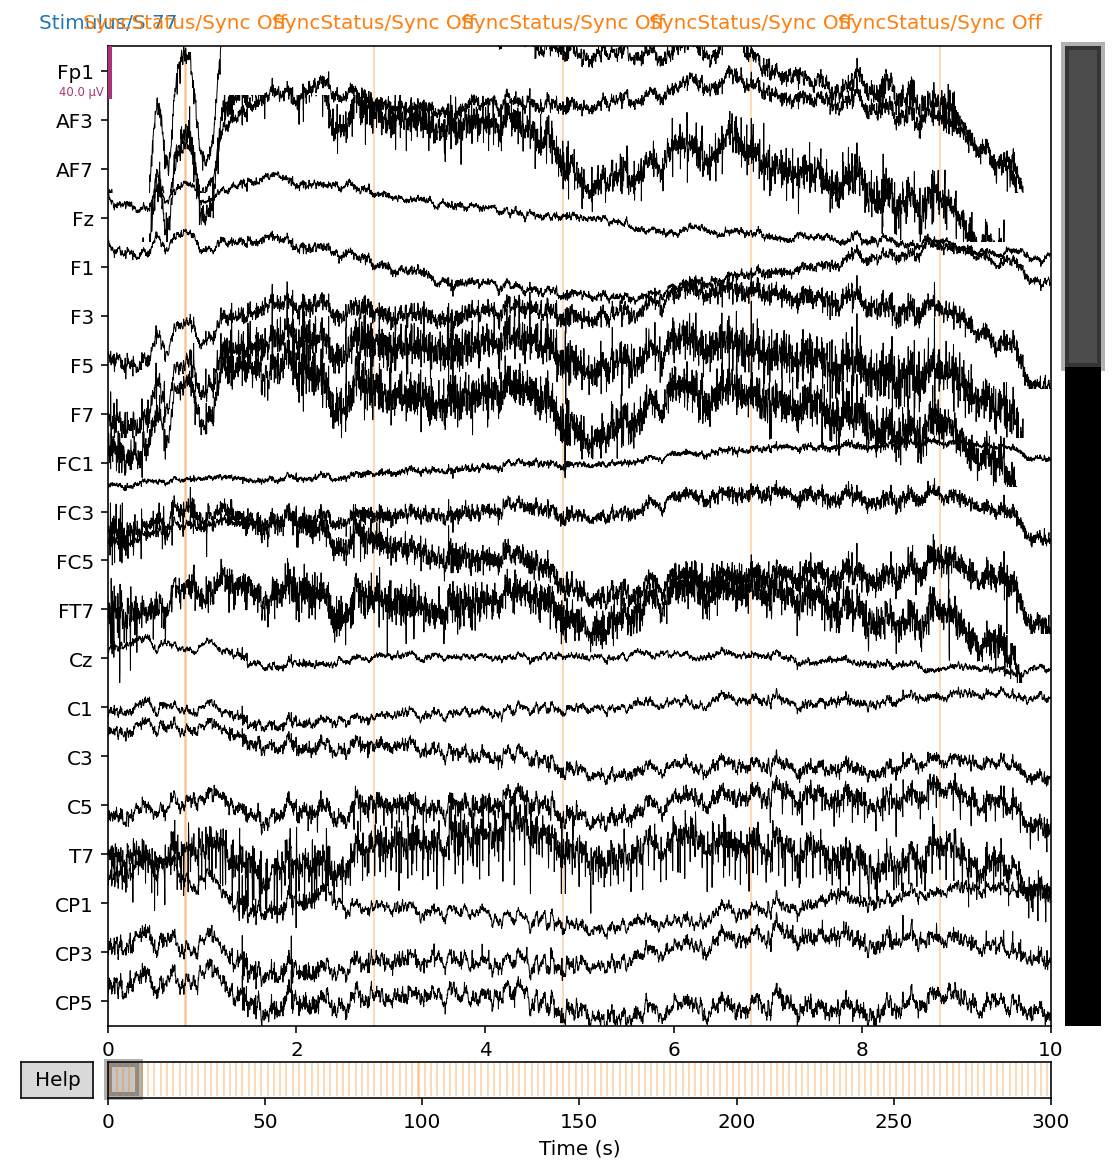

In [51]:
# plot the raw data
raw.plot()